<a href="https://colab.research.google.com/github/Neermita18/Digital_Pathology/blob/main/Training_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/MyDrive/data_final.zip" -d "/content/data_final"


Streaming output truncated to the last 5000 lines.
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_26000.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_27500.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_28000.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_29000.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_29500.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_30000.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_30500.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_31000.txt  
  inflating: /content/data_final/data_final/yolo/labels/val/be10fa37ad6e88e1f406_18000_32500.txt  
  inflating: /content/data_final/data_final/yolo/labels/va

In [3]:
!ls /content/data_final/data_final/patches/train | head

552c51bfb88fd3e65ffe_10000_13000.json
552c51bfb88fd3e65ffe_10000_13000.png
552c51bfb88fd3e65ffe_10000_14000.json
552c51bfb88fd3e65ffe_10000_14000.png
552c51bfb88fd3e65ffe_10000_46000.json
552c51bfb88fd3e65ffe_10000_46000.png
552c51bfb88fd3e65ffe_10500_15500.json
552c51bfb88fd3e65ffe_10500_15500.png
552c51bfb88fd3e65ffe_10500_31000.json
552c51bfb88fd3e65ffe_10500_31000.png


In [4]:
!ls /content/data_final/data_final/yolo/labels/train | head

552c51bfb88fd3e65ffe_10000_13000.txt
552c51bfb88fd3e65ffe_10000_14000.txt
552c51bfb88fd3e65ffe_10000_46000.txt
552c51bfb88fd3e65ffe_10500_15500.txt
552c51bfb88fd3e65ffe_10500_31000.txt
552c51bfb88fd3e65ffe_10500_41500.txt
552c51bfb88fd3e65ffe_10500_42000.txt
552c51bfb88fd3e65ffe_10500_42500.txt
552c51bfb88fd3e65ffe_10500_43000.txt
552c51bfb88fd3e65ffe_11000_12000.txt


In [5]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/data_final/data_final/patches/train/552c51bfb88fd3e65ffe_10000_13000.png"
label_path = "/content/data_final/data_final/yolo/labels/train/552c51bfb88fd3e65ffe_10000_13000.txt"


In [6]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, _ = img.shape
print("Image size:", w, h)


Image size: 500 500


In [7]:
with open(label_path, "r") as f:
    lines = f.readlines()

for line in lines:
    cls, xc, yc, bw, bh = map(float, line.strip().split())

    # Convert normalized → pixel
    x1 = int((xc - bw / 2) * w)
    y1 = int((yc - bh / 2) * h)
    x2 = int((xc + bw / 2) * w)
    y2 = int((yc + bh / 2) * h)

    # Draw box
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(
        img,
        f"class {int(cls)}",
        (x1, y1 - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.4,
        (255, 0, 0),
        1
    )


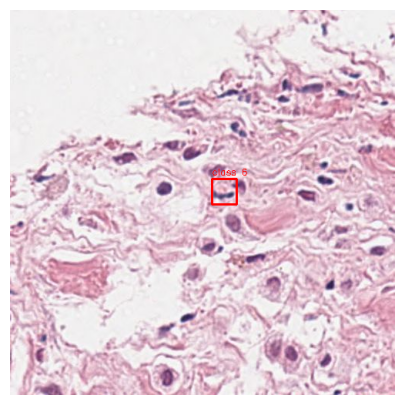

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")
plt.show()


In [9]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00


In [12]:
!mkdir -p /content/data_final/data_final/images
!mkdir -p /content/data_final/data_final/labels


In [13]:
!mv /content/data_final/data_final/patches/train /content/data_final/data_final/images/train
!mv /content/data_final/data_final/patches/val   /content/data_final/data_final/images/val


In [14]:
!mv /content/data_final/data_final/yolo/labels/train /content/data_final/data_final/labels/train
!mv /content/data_final/data_final/yolo/labels/val   /content/data_final/data_final/labels/val


In [16]:
!rm -f /content/data_final/data_final/images/train.cache
!rm -f /content/data_final/data_final/images/val.cache

In [19]:
from ultralytics import YOLO

# Load pretrained model
model = YOLO("yolov8n.pt")   # use yolov8s.pt later if this works

model.train(
    data="/content/dataset.yaml",
    epochs=20,
    imgsz=500,
    batch=8,              # reduce if OOM
    device=0,              # GPU 0, use 'cpu' if no GPU
    workers=4,
    project="mitosis_yolo",
    name="exp1",
    patience=10,
    optimizer="AdamW",
    lr0=1e-3,
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=500, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp14, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c86b6989e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [20]:
!zip -r mitosis_results.zip /content/mitosis_yolo/exp14

  adding: content/mitosis_yolo/exp14/ (stored 0%)
  adding: content/mitosis_yolo/exp14/labels.jpg (deflated 29%)
  adding: content/mitosis_yolo/exp14/val_batch1_labels.jpg (deflated 5%)
  adding: content/mitosis_yolo/exp14/train_batch23192.jpg (deflated 3%)
  adding: content/mitosis_yolo/exp14/train_batch23190.jpg (deflated 4%)
  adding: content/mitosis_yolo/exp14/BoxF1_curve.png (deflated 11%)
  adding: content/mitosis_yolo/exp14/val_batch1_pred.jpg (deflated 6%)
  adding: content/mitosis_yolo/exp14/args.yaml (deflated 52%)
  adding: content/mitosis_yolo/exp14/val_batch0_pred.jpg (deflated 6%)
  adding: content/mitosis_yolo/exp14/BoxR_curve.png (deflated 10%)
  adding: content/mitosis_yolo/exp14/BoxPR_curve.png (deflated 11%)
  adding: content/mitosis_yolo/exp14/confusion_matrix_normalized.png (deflated 20%)
  adding: content/mitosis_yolo/exp14/train_batch2.jpg (deflated 1%)
  adding: content/mitosis_yolo/exp14/results.png (deflated 7%)
  adding: content/mitosis_yolo/exp14/weights/ (s

In [21]:
from ultralytics import YOLO
model = YOLO("/content/mitosis_yolo/exp14/weights/best.pt")

model.train(
    data="/content/dataset.yaml",
    epochs=2,
    imgsz=512,
    batch=8,              # reduce if OOM
    device=0,              # GPU 0, use 'cpu' if no GPU
    workers=4,
    project="mitosis_yolo",
    name="exp15",
    mosaic=0.0,
    mixup=0.0,
    close_mosaic=0,
    patience=2,
    optimizer="AdamW",
    lr0=1e-3,
)

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=0, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/mitosis_yolo/exp14/weights/best.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=exp15, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=2, perspective=0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c84ffbde20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [22]:
!zip -r mitosis_results.zip /content/mitosis_yolo/exp15

  adding: content/mitosis_yolo/exp15/ (stored 0%)
  adding: content/mitosis_yolo/exp15/labels.jpg (deflated 29%)
  adding: content/mitosis_yolo/exp15/val_batch1_labels.jpg (deflated 5%)
  adding: content/mitosis_yolo/exp15/BoxF1_curve.png (deflated 11%)
  adding: content/mitosis_yolo/exp15/val_batch1_pred.jpg (deflated 6%)
  adding: content/mitosis_yolo/exp15/args.yaml (deflated 53%)
  adding: content/mitosis_yolo/exp15/val_batch0_pred.jpg (deflated 5%)
  adding: content/mitosis_yolo/exp15/BoxR_curve.png (deflated 9%)
  adding: content/mitosis_yolo/exp15/BoxPR_curve.png (deflated 11%)
  adding: content/mitosis_yolo/exp15/confusion_matrix_normalized.png (deflated 20%)
  adding: content/mitosis_yolo/exp15/train_batch2.jpg (deflated 4%)
  adding: content/mitosis_yolo/exp15/results.png (deflated 13%)
  adding: content/mitosis_yolo/exp15/weights/ (stored 0%)
  adding: content/mitosis_yolo/exp15/weights/last.pt (deflated 9%)
  adding: content/mitosis_yolo/exp15/weights/best.pt (deflated 9%)
